### Turn on autocomplete

In [181]:
%config IPCompleter.greedy=True

### Import Packages

In [182]:
import numpy as np
import pandas as pd

### Import Dataset

In [183]:
dataset = pd.read_csv('winequality-red.csv', sep = ';')

# get header names
print(dataset.columns)

# get response variable
y_data = np.matrix(dataset[['quality']])

# remove response variable - 1 is for column drop
dataset = dataset.drop('quality',1)

# convert to matrix
dataset = np.column_stack([np.repeat(1, len(dataset)), dataset])

x_data = np.matrix(dataset)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


### calculate StepGradient based on gradient of the loss function:

$$J(\theta ) = \frac{1}{2m}\sum_{i = 1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})^2$$ 

$$\underset{\theta_{0},\theta_{1}}{min}J(\theta_{0}, \theta_{1})$$

#### Update Rule:
$$\beta _{0} := \beta _{0} - \alpha \frac{\partial }{\partial \beta_{0}}J(\theta_{0}, \theta_{1})$$

$$\beta _{1} := \beta _{1} - \alpha \frac{\partial }{\partial \beta_{1}}J(\theta_{1}, \theta_{1})$$

#### Derivatives

$$\frac{\partial }{\partial \theta_{0}}J(\theta_{0}, \theta_{1}) = \frac{1}{m}\sum_{i = 1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})$$

$$\frac{\partial }{\partial \theta_{j}}J(\theta_{0}, \theta_{1},...,\theta_{n}) = \frac{1}{m}\sum_{i = 1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)}).x_{j}^{(i)}$$

### calculateError - Calculate error based on minimum square error

In [184]:
def calculateError(predictedValues, y_data):
    # x_data is a MxN matrix
    # y_data is a Mx1 matrix
    # betas is a Nx1 matrix with the regression parameters
    
    m = len(y_data)
    
    error = 1/(2*m) * np.sum(np.power((predictedValues - y_data),2))
    
    return error

### calculateStepGradient - Calculate partial derivatives of the cost function on each parameter

In [185]:
def calculateStepGradient(x_data, y_data, predictedValues):
    # x_data is a MxN matrix
    # y_data is a Mx1 matrix
    # betas is a Nx1 matrix with the regression parameters
    m = len(x_data)
    
    derivativePars = np.zeros((1,x_data.shape[1]))
    nbrBetas = derivativePars.shape[1]
    
    derivativePars[0,0]  = 1/m * np.sum(predictedValues - y_data)
    for i in list(range(1,nbrBetas)): # 1:n
        
        parTemp = 1/m * np.transpose(predictedValues - y_data) * (x_data[:,i])
        derivativePars[0,i] = parTemp.item()
    
    return derivativePars

### Define initial call for linear regression

In [186]:
def linearRegressionRun(x_data, y_data):
    # model parameters
    learningRate = 0.0001
    maxNbrIteractions = 1000
    errorConvergence = 0.00001 # if next iteraction doesn't improve on the limit, stop
    betas = np.zeros(shape = (x_data.shape[1], 1))
    
    errorArray = np.zeros(maxNbrIteractions) # store error
    calcErrorConvergence = 10                # random number
    i = 0                                    # count
    while( i < maxNbrIteractions and calcErrorConvergence > errorConvergence):
        
        predictedValues = np.matrix(x_data * betas)
        
        errorArray[i] = calculateError(predictedValues, y_data)
        print('Cost in iteraction ' + str(i) + ': ' + str(errorArray[i]))
        if(i >= 1): # calculate error convergence starting from index 1
            calcErrorConvergence = abs(errorArray[i] - errorArray[i-1])
            print('Error convergence: ' + str(calcErrorConvergence))
        
        betasGradient = calculateStepGradient(x_data, y_data, predictedValues)        
        print('Derivatives: ' + str(betasGradient))

        # multiply matrix times scalar
        learnedGradient = np.multiply(learningRate,betasGradient).transpose()
        betas = np.subtract(betas,learnedGradient)
        
        print('New betas: \n' + str(betas))
        print('\n')
        
        i = i + 1
    return (betas, errorArray)

### Call Function

In [187]:
(betas, errorArray) = linearRegressionRun(x_data, y_data)

Cost in iteraction 0: 16.2082551595
Derivatives: [[  -5.63602251  -47.06397749   -2.91836773   -1.56281426  -14.32439024
    -0.48806692  -89.04377736 -256.9793621    -5.61742029  -18.6543152
    -3.74373358  -59.15370023]]
New betas: 
[[  5.63602251e-04]
 [  4.70639775e-03]
 [  2.91836773e-04]
 [  1.56281426e-04]
 [  1.43243902e-03]
 [  4.88066917e-05]
 [  8.90437774e-03]
 [  2.56979362e-02]
 [  5.61742029e-04]
 [  1.86543152e-03]
 [  3.74373358e-04]
 [  5.91537002e-03]]


Cost in iteraction 1: 9.63617435327
Error convergence: 6.5720808062
Derivatives: [[  -4.18834462  -35.19754922   -2.1434485    -1.16455004  -10.37812004
    -0.35956055  -59.20183173 -159.93416439   -4.17433674  -13.86919965
    -2.78362443  -44.25028471]]
New betas: 
[[  9.82436714e-04]
 [  8.22615267e-03]
 [  5.06181623e-04]
 [  2.72736430e-04]
 [  2.47025103e-03]
 [  8.47627471e-05]
 [  1.48245609e-02]
 [  4.16913526e-02]
 [  9.79175703e-04]
 [  3.25235148e-03]
 [  6.52735801e-04]
 [  1.03403985e-02]]


Cost in i

Derivatives: [[ -0.9854866   -8.44835347  -0.46376136  -0.27760196  -1.99089232
   -0.07952495  -2.20745613   3.62207605  -0.98179641  -3.27261254
   -0.66300688 -10.80934838]]
New betas: 
[[ 0.01147796]
 [ 0.09887187]
 [ 0.00551269]
 [ 0.00323341]
 [ 0.02451353]
 [ 0.00094034]
 [ 0.0593389 ]
 [ 0.0294464 ]
 [ 0.01143655]
 [ 0.03809328]
 [ 0.00767333]
 [ 0.12513851]]


Cost in iteraction 79: 1.93528814323
Error convergence: 0.0222717266985
Derivatives: [[ -0.97865619  -8.38736002  -0.46042998  -0.27564054  -1.97565432
   -0.07895858  -2.1606597    3.58699752  -0.97498898  -3.24996385
   -0.65851363 -10.73456258]]
New betas: 
[[ 0.01157583]
 [ 0.09971061]
 [ 0.00555874]
 [ 0.00326097]
 [ 0.0247111 ]
 [ 0.00094823]
 [ 0.05955497]
 [ 0.0290877 ]
 [ 0.01153404]
 [ 0.03841827]
 [ 0.00773918]
 [ 0.12621196]]


Cost in iteraction 80: 1.91334910569
Error convergence: 0.0219390375436
Derivatives: [[ -0.97187902  -8.32683682  -0.45712427  -0.27369375  -1.96053654
   -0.07839659  -2.11439638   3.

Cost in iteraction 158: 0.898432541
Error convergence: 0.00721782411815
Derivatives: [[-0.57626594 -4.78269326 -0.26350602 -0.15863038 -1.08135925 -0.04551472
   0.21524332  1.63644598 -0.57394276 -1.91707621 -0.39395817 -6.33238839]]
New betas: 
[[ 0.01753825]
 [ 0.15014067]
 [ 0.00833141]
 [ 0.00492625]
 [ 0.0363823 ]
 [ 0.0014251 ]
 [ 0.0656236 ]
 [ 0.00949453]
 [ 0.01747342]
 [ 0.05823144]
 [ 0.0117782 ]
 [ 0.19165733]]


Cost in iteraction 159: 0.891310845833
Error convergence: 0.00712169516751
Derivatives: [[-0.57256391 -4.74939771 -0.26168632 -0.1575368  -1.07317313 -0.04520613
   0.23258003  1.61987769 -0.57025298 -1.90482967 -0.39152604 -6.29192927]]
New betas: 
[[ 0.01759551]
 [ 0.15061561]
 [ 0.00835758]
 [ 0.00494201]
 [ 0.03648962]
 [ 0.00142962]
 [ 0.06560034]
 [ 0.00933254]
 [ 0.01753045]
 [ 0.05842192]
 [ 0.01181735]
 [ 0.19228652]]


Cost in iteraction 160: 0.884283843573
Error convergence: 0.00702700225984
Derivatives: [[-0.56888944 -4.716347   -0.25987997 -0.15645096

 [ 0.23103898]]


Cost in iteraction 238: 0.54032126275
Error convergence: 0.00264722691528
Derivatives: [[-0.35154536 -2.75494318 -0.15260913 -0.09136088 -0.58682986 -0.0267361
   1.02409758  0.70491576 -0.3499604  -1.1745262  -0.24642656 -3.87852834]]
New betas: 
[[ 0.02115141]
 [ 0.17941587]
 [ 0.00994812]
 [ 0.00589817]
 [ 0.04283557]
 [ 0.00170597]
 [ 0.05994806]
 [ 0.00064696]
 [ 0.02107127]
 [ 0.07027249]
 [ 0.01427518]
 [ 0.23142684]]


Cost in iteraction 239: 0.53770475105
Error convergence: 0.00261651170002
Derivatives: [[-0.3494772  -2.73620594 -0.15158326 -0.0907315  -0.58230797 -0.02656274
   1.02865184  0.69722344 -0.34789896 -1.16770202 -0.24507005 -3.8559685 ]]
New betas: 
[[ 0.02118636]
 [ 0.17968949]
 [ 0.00996328]
 [ 0.00590724]
 [ 0.0428938 ]
 [ 0.00170863]
 [ 0.05984519]
 [ 0.00057723]
 [ 0.02110606]
 [ 0.07038926]
 [ 0.01429969]
 [ 0.23181243]]


Cost in iteraction 240: 0.5351185455
Error convergence: 0.0025862055506
Derivatives: [[-0.3474236  -2.71759906 -0.15056

New betas: 
[[ 0.0234013 ]
 [ 0.19634908]
 [ 0.01088916]
 [ 0.00645639]
 [ 0.04630527]
 [ 0.00187264]
 [ 0.05096022]
 [-0.00303559]
 [ 0.0233103 ]
 [ 0.07781415]
 [ 0.01587788]
 [ 0.25632277]]


Cost in iteraction 319: 0.400146286275
Error convergence: 0.00109319351306
Derivatives: [[-0.222931   -1.58618173 -0.08852478 -0.05170542 -0.30734419 -0.01592992
   1.15311634  0.27358851 -0.22176184 -0.75063308 -0.16214247 -2.47670553]]
New betas: 
[[ 0.02342359]
 [ 0.1965077 ]
 [ 0.01089802]
 [ 0.00646156]
 [ 0.04633601]
 [ 0.00187423]
 [ 0.05084491]
 [-0.00306295]
 [ 0.02333248]
 [ 0.07788921]
 [ 0.01589409]
 [ 0.25657044]]


Cost in iteraction 320: 0.399064207547
Error convergence: 0.00108207872794
Derivatives: [[-0.22174391 -1.575357   -0.08792991 -0.05133371 -0.30478552 -0.0158299
   1.15252947  0.27015002 -0.22057855 -0.74672596 -0.16136543 -2.46377873]]
New betas: 
[[ 0.02344576]
 [ 0.19666524]
 [ 0.01090681]
 [ 0.00646669]
 [ 0.04636648]
 [ 0.00187581]
 [ 0.05072966]
 [-0.00308996]
 [ 

Derivatives: [[-0.14933054 -0.91365043 -0.05146763 -0.02840728 -0.14988411 -0.00971765
   1.02868363  0.08731365 -0.14839656 -0.5086261  -0.11401553 -1.67569288]]
New betas: 
[[ 0.02486586]
 [ 0.20612653]
 [ 0.01143706]
 [ 0.00676944]
 [ 0.04808006]
 [ 0.00197318]
 [ 0.04214809]
 [-0.00437861]
 [ 0.02476654]
 [ 0.08277036]
 [ 0.01696643]
 [ 0.27266534]]


Cost in iteraction 399: 0.339983472995
Error convergence: 0.000503897231185
Derivatives: [[-0.14861533 -0.90710226 -0.05110543 -0.02817817 -0.14836882 -0.00965717
   1.02644688  0.08581793 -0.14768363 -0.50627695 -0.11354848 -1.66791343]]
New betas: 
[[ 0.02488072]
 [ 0.20621724]
 [ 0.01144217]
 [ 0.00677226]
 [ 0.0480949 ]
 [ 0.00197414]
 [ 0.04204544]
 [-0.00438719]
 [ 0.0247813 ]
 [ 0.08282099]
 [ 0.01697778]
 [ 0.27283213]]


Cost in iteraction 400: 0.339484184577
Error convergence: 0.000499288417523
Derivatives: [[-0.14790455 -0.90059433 -0.05074543 -0.02795043 -0.14686325 -0.00959706
   1.02420079  0.08433854 -0.1469751  -0.5039

Derivatives: [[-0.10385601 -0.49709186 -0.02832425 -0.01373297 -0.05443351 -0.00586889
   0.83411648  0.0082665  -0.10306689 -0.35936041 -0.08435677 -1.18114243]]
New betas: 
[[ 0.02586185]
 [ 0.21161612]
 [ 0.01174787]
 [ 0.00693273]
 [ 0.04886082]
 [ 0.00203411]
 [ 0.03469367]
 [-0.00470882]
 [ 0.02575569]
 [ 0.08618718]
 [ 0.01774893]
 [ 0.28391038]]


Cost in iteraction 479: 0.311309720174
Error convergence: 0.000249442707191
Derivatives: [[-0.10341298 -0.49303452 -0.02809743 -0.01358903 -0.05351478 -0.00583138
   0.83162825  0.00767842 -0.10262527 -0.35790709 -0.08406828 -1.17632425]]
New betas: 
[[ 0.02587219]
 [ 0.21166542]
 [ 0.01175068]
 [ 0.00693409]
 [ 0.04886617]
 [ 0.00203469]
 [ 0.03461051]
 [-0.00470958]
 [ 0.02576595]
 [ 0.08622297]
 [ 0.01775734]
 [ 0.28402801]]


Cost in iteraction 480: 0.311062364523
Error convergence: 0.000247355650787
Derivatives: [[-0.10297249 -0.48900068 -0.02787188 -0.01344589 -0.05260162 -0.00579408
   0.82914143  0.00709772 -0.10218619 -0.3564


Cost in iteraction 559: 0.296719517853
Error convergence: 0.000131217805768
Derivatives: [[-0.07498622 -0.23320639 -0.01346851 -0.00433443  0.00472741 -0.00342578
   0.64217037 -0.02086058 -0.07429    -0.26467131 -0.06558672 -0.86703653]]
New betas: 
[[ 0.02657592]
 [ 0.21447927]
 [ 0.01191197]
 [ 0.00700258]
 [ 0.04904006]
 [ 0.00207088]
 [ 0.02874028]
 [-0.00463434]
 [ 0.02646377]
 [ 0.0886809 ]
 [ 0.0183495 ]
 [ 0.2920943 ]]


Cost in iteraction 560: 0.296589297728
Error convergence: 0.000130220124825
Derivatives: [[-0.07470448 -0.23064008 -0.01332265 -0.00424274  0.00529592 -0.00340197
   0.63996988 -0.02104357 -0.07400918 -0.26374719 -0.0654039  -0.8639687 ]]
New betas: 
[[ 0.02658339]
 [ 0.21450233]
 [ 0.0119133 ]
 [ 0.00700301]
 [ 0.04903953]
 [ 0.00207122]
 [ 0.02867629]
 [-0.00463223]
 [ 0.02647117]
 [ 0.08870727]
 [ 0.01835604]
 [ 0.29218069]]


Cost in iteraction 561: 0.296460066354
Error convergence: 0.000129231374127
Derivatives: [[-0.07442426 -0.22808788 -0.01317756 -0.0

Derivatives: [[-0.05638123 -0.06462018 -0.00378637  0.00168816  0.04169899 -0.00185782
   0.4809578  -0.0279875  -0.05574659 -0.20361207 -0.05353703 -0.66419253]]
New betas: 
[[ 0.02710171]
 [ 0.2156274 ]
 [ 0.01197867]
 [ 0.00701122]
 [ 0.04883875]
 [ 0.00209175]
 [ 0.02422339]
 [-0.00442712]
 [ 0.02698419]
 [ 0.090557  ]
 [ 0.01882787]
 [ 0.29822806]]


Cost in iteraction 641: 0.28866780424
Error convergence: 7.28586209892e-05
Derivatives: [[-0.05619692 -0.06296304 -0.00368986  0.00174725  0.042058   -0.00184235
   0.47918895 -0.02800424 -0.05556291 -0.20300663 -0.05341796 -0.66217938]]
New betas: 
[[ 0.02710733]
 [ 0.2156337 ]
 [ 0.01197904]
 [ 0.00701104]
 [ 0.04883455]
 [ 0.00209193]
 [ 0.02417547]
 [-0.00442432]
 [ 0.02698974]
 [ 0.0905773 ]
 [ 0.01883321]
 [ 0.29829428]]


Cost in iteraction 642: 0.288595429534
Error convergence: 7.23747059337e-05
Derivatives: [[-0.05601355 -0.06131465 -0.00359382  0.00180601  0.04241502 -0.00182696
   0.47742552 -0.02801976 -0.05538016 -0.20240

Derivatives: [[-0.04432107  0.04280862  0.00256301  0.00549924  0.06472869 -0.00085076
   0.35738526 -0.02659335 -0.04372835 -0.16393956 -0.04576335 -0.53216357]]
New betas: 
[[ 0.02749578]
 [ 0.21567904]
 [ 0.0119816 ]
 [ 0.00698157]
 [ 0.04841061]
 [ 0.00210213]
 [ 0.02093927]
 [-0.00420857]
 [ 0.02737342]
 [ 0.09199674]
 [ 0.01921769]
 [ 0.3029136 ]]


Cost in iteraction 720: 0.284149735803
Error convergence: 4.49918207643e-05
Derivatives: [[-0.04419641  0.04390482  0.00262907  0.00553781  0.06496065 -0.00084043
   0.35602225 -0.0265514  -0.04360414 -0.16352868 -0.04568324 -0.53079467]]
New betas: 
[[ 0.0275002 ]
 [ 0.21567465]
 [ 0.01198134]
 [ 0.00698102]
 [ 0.04840412]
 [ 0.00210221]
 [ 0.02090367]
 [-0.00420591]
 [ 0.02737778]
 [ 0.09201309]
 [ 0.01922226]
 [ 0.30296668]]


Cost in iteraction 721: 0.284104990219
Error convergence: 4.47455833314e-05
Derivatives: [[-0.04407235  0.04499537  0.00269481  0.00557618  0.06519135 -0.00083014
   0.35466401 -0.02650908 -0.04348053 -0.1631

 [ 0.30637732]]


Cost in iteraction 791: 0.281478010411
Error convergence: 3.1750047259e-05
Derivatives: [[ -3.67029952e-02   1.08904704e-01   6.62188203e-03   7.80115330e-03
    7.85597950e-02  -2.23902268e-04   2.70751325e-01  -2.29283072e-02
   -3.61386160e-02  -1.38775829e-01  -4.08810294e-02  -4.48245024e-01]]
New betas: 
[[ 0.02778554]
 [ 0.21511489]
 [ 0.01194754]
 [ 0.00693303]
 [ 0.04789081]
 [ 0.00210583]
 [ 0.01869589]
 [-0.00402986]
 [ 0.02765902]
 [ 0.0930802 ]
 [ 0.01952836]
 [ 0.30642214]]


Cost in iteraction 792: 0.281446396864
Error convergence: 3.16135462597e-05
Derivatives: [[ -3.66142582e-02   1.09661124e-01   6.66947131e-03   7.82711541e-03
    7.87158921e-02  -2.16672389e-04   2.69702093e-01  -2.28721482e-02
   -3.60502233e-02  -1.38481883e-01  -4.08243542e-02  -4.47263541e-01]]
New betas: 
[[ 0.0277892 ]
 [ 0.21510393]
 [ 0.01194687]
 [ 0.00693225]
 [ 0.04788293]
 [ 0.00210585]
 [ 0.01866892]
 [-0.00402758]
 [ 0.02766262]
 [ 0.09309405]
 [ 0.01953244]
 [ 0.3064



Cost in iteraction 865: 0.279442617071
Error convergence: 2.41139043898e-05
Derivatives: [[ -3.11179369e-02   1.55566853e-01   9.63654144e-03   9.37355522e-03
    8.80518353e-02   2.26050120e-04   2.02960672e-01  -1.87744570e-02
   -3.05761990e-02  -1.20214697e-01  -3.73268165e-02  -3.86190891e-01]]
New betas: 
[[ 0.02803504]
 [ 0.21412306]
 [ 0.01188664]
 [ 0.00686899]
 [ 0.04727145]
 [ 0.0021057 ]
 [ 0.01695839]
 [-0.00387586]
 [ 0.02790443]
 [ 0.09403379]
 [ 0.0198168 ]
 [ 0.30949402]]


Cost in iteraction 866: 0.279418578679
Error convergence: 2.40383915131e-05
Derivatives: [[ -3.10544931e-02   1.56083172e-01   9.67105558e-03   9.39051214e-03
    8.81549334e-02   2.31087214e-04   2.02170834e-01  -1.87200237e-02
   -3.05130267e-02  -1.20002967e-01  -3.72866250e-02  -3.85481916e-01]]
New betas: 
[[ 0.02803814]
 [ 0.21410745]
 [ 0.01188567]
 [ 0.00686806]
 [ 0.04726264]
 [ 0.00210568]
 [ 0.01693817]
 [-0.00387398]
 [ 0.02790748]
 [ 0.09404579]
 [ 0.01982052]
 [ 0.30953257]]


Cost i

Derivatives: [[-0.02738111  0.18518756  0.01168384  0.01031944  0.09386064  0.00051845
   0.15576813 -0.01529448 -0.02685617 -0.10769216 -0.03496969 -0.3441981 ]]
New betas: 
[[ 0.02823312]
 [ 0.21295703]
 [ 0.01181372]
 [ 0.00680177]
 [ 0.04665135]
 [ 0.0021031 ]
 [ 0.01574828]
 [-0.00376047]
 [ 0.02809889]
 [ 0.094806  ]
 [ 0.02006208]
 [ 0.31196847]]


Cost in iteraction 934: 0.27793314984
Error convergence: 2.00496410254e-05
Derivatives: [[-0.02733398  0.18554868  0.01170988  0.01033054  0.0939298   0.00052207
   0.1551651  -0.0152471  -0.02680927 -0.10753344 -0.03494012 -0.3436649 ]]
New betas: 
[[ 0.02823585]
 [ 0.21293848]
 [ 0.01181255]
 [ 0.00680073]
 [ 0.04664196]
 [ 0.00210305]
 [ 0.01573276]
 [-0.00375894]
 [ 0.02810157]
 [ 0.09481676]
 [ 0.02006557]
 [ 0.31200284]]


Cost in iteraction 935: 0.27791314505
Error convergence: 2.00047893816e-05
Derivatives: [[-0.02728706  0.18590788  0.01173581  0.01034156  0.09399854  0.00052567
   0.15456449 -0.01519984 -0.02676258 -0.107375

### Plot Error Curve

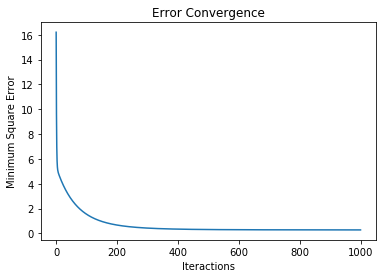

In [188]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(errorArray[errorArray != 0])
plt.xlabel('Iteractions')
plt.ylabel('Minimum Square Error')
plt.title('Error Convergence')
plt.show()

### Plot data and line

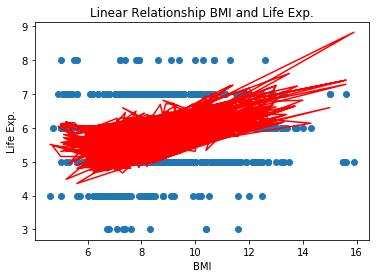

In [176]:
# How to plot N-Dimensional Regression? Is it going to be linear on a 2-d plot?


plt.scatter(np.array(x_data[:,1]), np.array(y_data))

predictedData = x_data * betas
plt.plot(np.array(x_data[:,1]), predictedData, 'r')

plt.xlabel('BMI')
plt.ylabel('Life Exp.')

plt.title('Linear Relationship BMI and Life Exp.')

plt.show()